In [120]:
import vnstock as vn
from prophet import Prophet # Prophet dự đoán dựa theo thời vụ nên maybe tốt hơn Linear Regression 
from prophet.plot import plot_plotly
import plotly.offline as pyo
import plotly.graph_objs as go

In [121]:
# Load data
START = "2019-01-01"
END = "2024-02-01"
def load_data(ticker):
        data = vn.stock_historical_data(ticker, START, END)    
        return data
data = load_data('VCB')
data.sample(5)

,time,open,high,low,close,volume,ticker
1006,2023-01-09,72650,73580,71800,73580,1667100,VCB
851,2022-06-02,68420,68420,66890,66890,641400,VCB
1258,2024-01-11,89500,90000,88600,89300,1489100,VCB
424,2020-09-15,53990,54320,53670,53670,998970,VCB
181,2019-09-26,52030,52420,51770,52230,1040190,VCB


## Predict Close Price of each stock in portfolio (unit week)



In [122]:
n_weeks = int(input("Enter the predicted number of weeks: "))
period = n_weeks * 7
df_train = data[['time', 'close']]
df_train = df_train.rename(columns={"time": "ds", "close":"y"}) #Rename thành "ds" với "y" vì mô hình Prophet bắt buộc

# Use the Prophet model for training
m = Prophet()
m.fit(df_train)
future = m.make_future_dataframe(period)
forecast = m.predict(future)

07:31:20 - cmdstanpy - INFO - Chain [1] start processing
07:31:21 - cmdstanpy - INFO - Chain [1] done processing


## Visualization:

3 biểu đồ đều giống nhau, 2 biểu đồ sau để tương tác dễ dàng hơn.

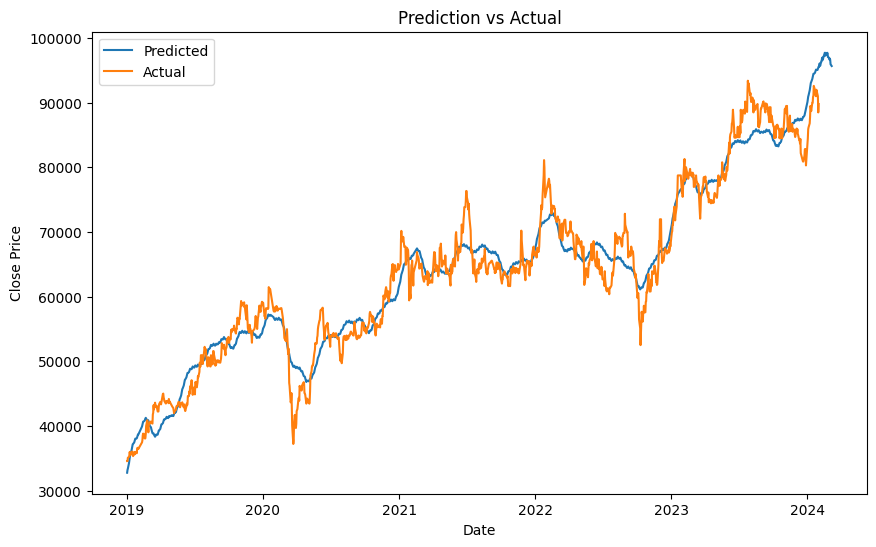

In [123]:
# Chart 1
plt.figure(figsize=(10, 6))
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted')
plt.plot(df_train['ds'], df_train['y'], label='Actual')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Prediction vs Actual')
plt.legend()
plt.show()

In [124]:
# Chart 2
trace1 = go.Scatter(x=forecast['ds'], y=forecast['yhat'], name='Predicted')
trace2 = go.Scatter(x=df_train['ds'], y=df_train['y'], name='Actual')
data = [trace1, trace2]

layout = go.Layout(
    title='Prediction vs Actual',
    xaxis=dict(title='Time'),
    yaxis=dict(title='Close Price'),
    legend=dict(x=0.7, y=0.9)
)

fig = go.Figure(data=data, layout=layout)
pyo.plot(fig)

'temp-plot.html'

In [125]:
# Chart 3
fig1 = plot_plotly(m, forecast)
fig1.update_layout(
    title='Prediction vs Actual',
    xaxis=dict(title='Time'),
    yaxis=dict(title='Close Price'),
    legend=dict(x=0.7, y=0.9)
)

pyo.plot(fig1)


'temp-plot.html'